# 1. Business Understanding

Dataset source: https://www.kaggle.com/datasets/grassknoted/asl-alphabet 

# 2. Data Understanding

## 2.1 Reading data and recoloring

In [40]:
from skimage.io import imread
import numpy as np
from pathlib import Path

p = Path("datasets/asl_alphabet_train")
files = [str(f) for f in p.rglob("*.jpg") if "/A/" in str(f)]

#images are 200x200 - 40k pixels
X = np.empty(shape=(1,40000))
y = np.array([""])
for f in files:
    img = imread(f, as_gray=True) #read in grayscale
    img = img.reshape((1,40000)) #reshape to row vector
    X = np.concatenate((X, img))

    targ = np.array([f.split("/")[3]]) #get the class as the 4th subdirectory
    y = np.concatenate((y, targ))

X = np.delete(X, 0, 0) #remove the empty row from initiation
y = np.delete(y, 0, 0)

(3000, 40000)

#### Store the dataset as pickle object for convenience

In [41]:
y = np.delete(y, 0, 0) #remove the empty row from initiation

In [42]:
import pickle

#Serialization
with open("datasets/X.pkl", "wb") as f:
    pickle.dump(X, f)

with open("datasets/y.pkl", "wb") as f:
    pickle.dump(y, f)

#Function to read the data back into memory
def readXy():
    """Load the dataset and target from pickle files"""
    xf = open("datasets/X.pkl", "rb")
    yf = open("datasets/y.pkl", "rb")

    return pickle.load(xf), pickle.load(yf)

#### Read in data from pickle file if needed

In [43]:
X, y = readXy()

### 2.2 Image visualizations

Some sample images are shown

In [44]:
#Helper function to convert image features back into matrix

H = 200
W = 200

def to_matrix(img: np.array):
    """Reshape the row image to a matrix"""
    global H,W
    return np.reshape(img, (H,W))

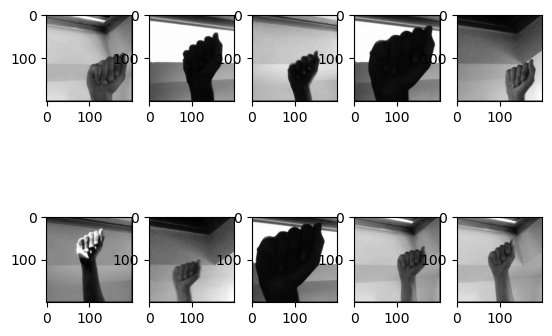

In [48]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(to_matrix(X[i]), cmap=plt.cm.gray)

plt.show()